# Clusterizace

Také se nazývá shluková analýza, v angličtině clustering. Slouží k roztřídění dat, o kterých nepotřebujeme znát jejich význam, vytváří skupiny (shluky objektů / clustery) na základě podobnosti - aby si prvky skupiny byli navzájem podobní, ale nebyli příliš podobní s prvky mimo tutu skupinu.

## Použití

Umožňuje řešit typ problému, který se vyskytuje v mnoha oblastech, například data mining, marketing, biologie, medicína, analýza obrazu, počítačová grafika, machine learning a další.

### Kdy použít clusterizaci a kdy klasifikaci
Obě metody se využívají pro rozdělení do skupin na základě vlastností prvků, takže jsou si celkem podobné, ale mají jisté rozdíly, které určují jejich využití.

| Parametr | Klasifikace | Clusterizace |
| --- | --- | --- |
| učení | s učitelem (trénovací data) | bez učitele |
| použití | rozdělení do předem definovaných tříd | rozdělení do clusterů na základě podobnosti, "neznáme" význam tříd |
| komplexnost | složitější než clusterizace | méně složitá než klasifikace |

Klasifikace vyžaduje učení s učitelem, takže je třeba mít nějaká data obsahující třídy, do kterých jsou roztříděny.

Clusterizaci použijeme v případě, že hledáme nějakou novou, dosud neznámou informaci, předem neznáme výstup. Například rozdělení diváků seriálů do clusterů podle toho, na co se dívali, pro doporučení dalších pořadů (Netflix).

### Použité knihovny
##### NumPy
- Práce s maticemi
- https://numpy.org/doc/stable/index.html

##### matplotlib
- Práce s grafy
- https://matplotlib.org/

##### skicit-learn 
- Nástroje pro machine learning
- https://scikit-learn.org/stable/index.html

##### SciPy
- Nástroje pro různé matematické a vědecké operace
- Obsahuje i základní algoritmy pro clusterizaci
- https://www.scipy.org/scipylib/index.html


## Hierarchické algoritmy
Rozdělení do hierarchické struktury clusterů. Může být přístup **bottom-up**, kde se jednotlivé datové prvky spojují do clusterů, nebo **top-down**, kde na začátku máme velký cluster, který postupně rozdělujeme na menší clustery. 



*postup:*
    1. Každý prvek se přiřadí do samostatného clusteru. Tedy na začátku bude stejný počet clusterů jako je datových prvků.
    2. Najde se nebližší (nejpodobnější) dvojice clusterů, které se spojí do společného clusteru. Tedy se sníží počet clusterů o jedna. Tento krok opakujeme, dokud není překročena omezující podmínka nebo dokud není pouze jeden cluster.

Omezující podmínkou může být počet clusterů nebo maximální vzdálenost.

Pro hierarchické algoritmy jsou typické dendrogramy znázorňující jednotlivé kroky.

Základní algoritmy mají časovou složitost O(n^3), což není moc dobré, především pro velké datové sady.

Vzdálenost clusterů je určena metrikou (linkage metrics), kde nejběžnější je **Single-linkage**, která určuje vzdálenost clusterů na základě 2 nejbližších prvků jednotlivých clusterů. Další metrikou je **Complete-linkage**, která určuje vzdálenost clusterů jako vzdálenost jejich nejvzdálenějších prvků. Třetí možností je **Average-linkage**, která rozhoduje na základě průměru clusterů. Používá se také **Ward-linkage**, která je složitější a snaží se minimalizovat varianci clusterů, které se slučují.
<img src="resources/linkage.png">
(https://www.researchgate.net/figure/The-three-linkage-types-of-hierarchical-clustering-single-link-complete-link-and_fig57_281014334)

#### Jednoduchý Příklad
(https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/)

Importy

In [4]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

- Vytvoření bodů a jejich vykreslení v grafu

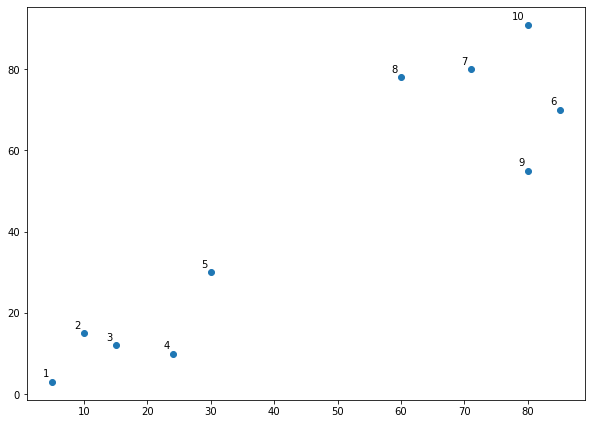

In [5]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [80,55],
    [80,91],])

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

- Hierarchické clusterování bottom-up na základě **Euklidovké vzdálenosti**
- Vykreslení dendrogramu, kde můžeme vidět pořadí vytváření clusterů. Hodnota na vertikální ose udává vzdálenost

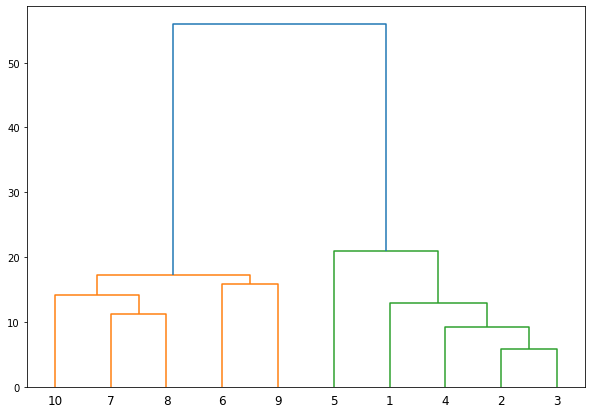

In [6]:
linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

- Použití knihovny skicit-learn pro hierarchické clusterování
- Výsledkem jsou opět 2 clustery

[1 1 1 1 1 0 0 0 0 0]


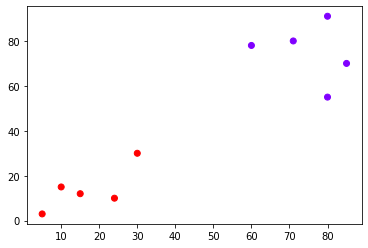

In [7]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
print(cluster.labels_)
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

##### Zajímavé parametry funkce AgglomerativeClustering
- n_clusters - počet clusterů, nelze kombinovat s distance_threshold
- affinity - metrika použitá pro výpočet vzdálenosti
- linkage - linkage metrika pro určení vzdálenosti clusterů
- distance_threshold - hranice, kdy clustery o větší vzdálenosti nebudou sloučeny, nelze kombinovat s n_clusters

## Nehierarchické algoritmy
Netvoří se stromová struktura mezi jednotlivými clustery. Nehierarchické algoritmy jsou všeobecně rychlejší než hierarchické, což je důležité především u velkých datových sad.

###  k-means
Nejběžnější nehierarchický algoritmus, iterativně formuje clustery. Počet clusterů (k) musí být předem známý. Průměrná složitost je O(knT), kde T je počet iterací.

Vhodný pro clustery podobných velikostí a nižší počet clusterů.

*postup:*
    1. Náhodně se zvolí k vzorků dat, které tvoří středy clusterů, tzv. centroidy
    2. Přiřadí se každý ze vzorků do clusteru nejbližšího centroidu
    3. Vypočítá se střed každého clusteru pomocí průměru a centroidy se umístí do těchto bodů
    4. Kroky 2 a 3 opakujeme dokud se centroidy nepřestanou měnit (případně při překročení omezující podmínky, např. počet iterací)
    
Clustery jsou tedy tvořeny na základě vzdálenosti jednotlivých prvků od centroidů.

Ukázka algoritmu, náhodný výběr v prvním kroku může zásadně ovlivnit výsledek algoritmu.
<img src="resources/kmeans.gif">
(https://realpython.com/k-means-clustering-python/)

#### Jednoduchý Příklad

- Použití stejných dat jako při ukázce hierarchického algoritmu
- Vykreslení do grafu

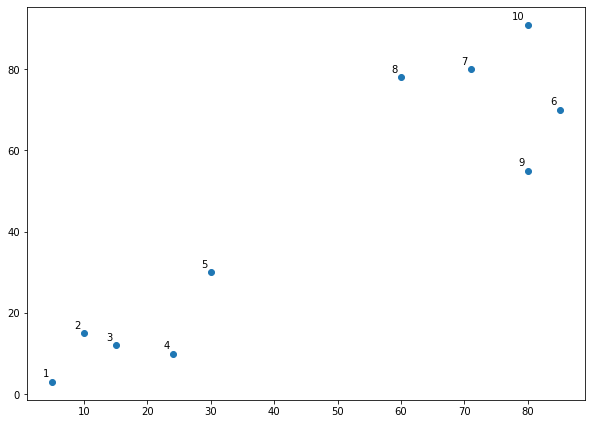

In [8]:
from sklearn.cluster import KMeans

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

- Použití algoritmu k-means
- Výpis bodů v jednotlivých clusterech
- Výpis pozic centroidů
- Vykreslení v grafu včetně pozic centroidů

[1 1 1 1 1 0 0 0 0 0]
[[75.2 74.8]
 [16.8 14. ]]


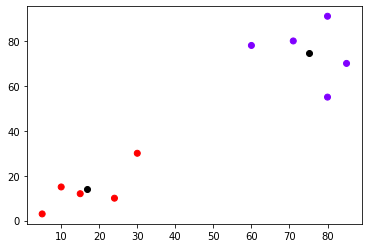

In [11]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.show()

##### Zajímavé parametry KMeans
- n_clusters - počet clusterů
- init - metoda pro volbu výchozích centroidů, výchozí hodnota se snaží najít nejlepší volbu pro kratší běh algoritmu
- n_init - algoritmus bude spuštěn vícekrát s různými výchozími pozicemi centroidů pro záskání nejlepšího výsledku (default = 10)
- max_iter - maximální množství iterací
- tol - tolerance, ve které se považuje změna pozice centroidu za nulovou

###  DBSCAN (Density Based Spatial Clustering of Applications with Noise)
Algoritmus založený na hustotě - jak moc sousedů se nachází v okolí jednoho bodu. Nepotřebuje znát počet clusterů, takže je vhodný když toto množství neznáme nebo nemůžeme vizualizovat dataset. Vidí cluster jako oblast, kde jsou data v hustém shluku, kolem kterého jsou data v menší hustotě. Díky tomu mohou být clustery libovolných tvarů, oproti k-means, který předpokládá, že jsou clustery konvexního tvaru. 

Algoritmus je založený na konceptu "core samples", což jsou vzorky, které se nacházejí v oblastech velké hustoty, kolem kterých se tvoří clustery. Je vhodný pro data s clustery podobné hustoty.

<img src="resources/convex.png">

(https://undergroundmathematics.org/glossary/convex-shape)

#### Jednoduchý příklad
(https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py)

- importy

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

- Vygenerování dat pomocí funkce make_blobs
- Standardizace dat

In [78]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
X = StandardScaler().fit_transform(X)

- Použití algoritmu

In [79]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

- Vykreslení do grafu
- Vytvořili se 3 clustery
- Prvky ve větší vzdálenost od clusterů jsou označeny za "noise"

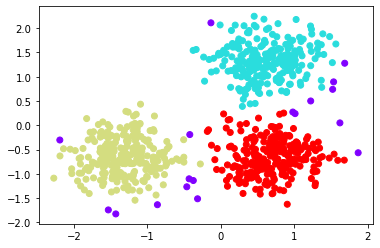

In [81]:
plt.scatter(X[:,0],X[:,1], c=db.labels_, cmap='rainbow')
plt.show()

##### Zajímavé parametry DBSCAN
- eps - Maximální vzdálenost mezi prvky, aby byly považovány, že jsou v blízkosti
- min_samples - minimální množství prvků, které musí být v blízkosti, aby byl bod považovaný za "core sample"
- metric - metrika použitá pro výpočet vzdálenosti

In [ ]:
a

In [ ]:
a = 10
print(a)

In [ ]:
a

## Vstup z konsole (`input()`)
Opakem příkazu `print()`, který zajišťuje výstup je `input()` pro vstup.

In [ ]:
a = input()
print(a)


Input se vstupní hláškou

In [ ]:
a = input("Strana: ")
print(a)

## Pravidla pro pojmenování proměnných
*[PEP8](https://www.python.org/dev/peps/pep-0008/) – Style Guide for Python Code*

Proměnné musí začínat písmenem či podtržítkem

Proměnné jsou *case sensitive*

In [ ]:
cislo = 1
Cislo = 2
číslo = 3
print(cislo, Cislo, číslo)

Pro více-slovné proměnné používáme jako oddělovač podtržítko `_`

In [ ]:
moje_oblibene_cislo = 42
print(moje_oblibene_cislo)

Další ukázky

In [ ]:
x = 10
print(x)

In [ ]:
_y = 20
$y = 50
9x = 30
print(_y)
print($y)
print(9x)


## Operátory přiřazení

Základní přiražení

In [ ]:
a = 1
b = a + 1
print(b)

Vícenásobné přiřazeni

In [ ]:
a, b, c = 1, 2, 3
print(a, b, c)

Prohození dvou proměných díky přiřazeni

In [ ]:
a = 1
b = 2
a, b = b, a
print(a, b)

> #### Příklad:
> Do proměnných `a,b,c` přiřaďte hodnoty `ahoj, 10, 20.23` a následně je vypište.

In [ ]:
# Řešení

### Operátor přiřazení kombinovavý s operací
Operátory přiřazení lze zkombinovat s operací, tedy zápis:
- `a = a + 1`
Je stejný jako zápis:
- `a += 1`

In [ ]:
a = 1
b = 1
a = a + 1
b += 1
print(a, b)

Takto se dají kombinovat i další binární operátory.

## Rezervovaná slova
Jedná se o slova, která nelze použít pro názvy proměnných.

`and `
`exec `
`not`
`assert`
`finally`
`or`
`break`
`for`
`pass`
`class`
`from`
`print`
`continue`
`lambda`
`yield`
`global`
`raise`
`def`
`if`
`return`
`del`
`import`
`try`
`elif`
`in`
`while`
`else`
`is`
`with `
`except`

## Konce řádků a středníky
Z mnoha programovacích jazyků jsme zvyklí ukončovat příkazy středníky.
To má velkou výhodu v tom, že když chceme napsat příkaz na více řádků, ničemu to nevadí.

V Pythonu platí co řádek to příkaz.
Když chceme napsat příkaz na více řádků, použijeme znak `\`.

In [ ]:
"Ahoj" +\
" " +\
"svetě."

## Import funkci, objeku, modulu
Pokud chceme použit něco, co není soušátí standatního balíčku, pak musíme provést import.

Například python nezná konstantu `pi`, ta je v modulu `math`.

In [ ]:
import math
math.pi

pokud bychom chtěli pouze `pi`

In [1]:
from math import pi
pi

3.141592653589793